In [1]:
import os
import sys
sys.path.append('../../')
from melodies_monet import driver
import numpy as np

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

plt.set_loglevel (level = 'warning')

Please install s3fs if retrieving from the Amazon S3 Servers.  Otherwise continue with local data
Please install h5netcdf to open files from the Amazon S3 servers.


In [2]:
an = driver.analysis()
an.control = '../yaml/control_tropomi_l2_no2.yaml'
an.read_control()
an.control_dict

{'analysis': {'start_time': '2019-07-15',
  'end_time': '2019-07-16',
  'debug': True,
  'output_dir': '/Users/mengli/Work/melodies-monet/outdata',
  'output_dir_save': '/Users/mengli/Work/melodies-monet/outdata/save_intermediate',
  'output_dir_read': '/Users/mengli/Work/melodies-monet/outdata/read_intermediate',
  'save': {'paired': {'method': 'netcdf', 'prefix': '201907', 'data': 'all'}},
  'read': {'paired': {'method': 'netcdf',
    'filenames': {'tropomi_l2_no2_wrfchem_v4.2': ['201907_tropomi_l2_no2_wrfchem_v4.2.nc4']}}}},
 'obs': {'tropomi_l2_no2': {'debug': True,
   'filename': '/Users/mengli/Work/melodies-monet/obsdata/tropomi_no2/20190715/*',
   'obs_type': 'sat_swath_clm',
   'sat_type': 'tropomi_l2_no2',
   'variables': {'qa_value': {'quality_flag_min': 0.7,
     'var_applied': ['nitrogendioxide_tropospheric_column'],
     'fillvalue': 9.96921e+36},
    'nitrogendioxide_tropospheric_column': {'scale': 6.022141e+19,
     'fillvalue': 9.96921e+36,
     'ylabel_plot': 'NO2 trop

In [3]:
# --- satobs
an.open_obs()

Reading TROPOMI L2 NO2
/Users/mengli/Work/melodies-monet/obsdata/tropomi_no2/20190715/*
reading /Users/mengli/Work/melodies-monet/obsdata/tropomi_no2/20190715/S5P_RPRO_L2__NO2____20190714T231100_20190715T005230_09074_03_020400_20221105T205731.nc
Reading tropomi l2 no2 data:  qa_value
Reading tropomi l2 no2 data:  nitrogendioxide_tropospheric_column
Reading tropomi l2 no2 data:  averaging_kernel
Reading tropomi l2 no2 data:  air_mass_factor_total
Reading tropomi l2 no2 data:  air_mass_factor_troposphere
Reading tropomi l2 no2 data:  latitude
Reading tropomi l2 no2 data:  longitude
Reading tropomi l2 no2 data:  preslev
DEBUG:root:preslev
Working on TROPOMI NO2 pressure
nitrogendioxide_tropospheric_column
DEBUG:root:nitrogendioxide_tropospheric_column
reading /Users/mengli/Work/melodies-monet/obsdata/tropomi_no2/20190715/S5P_RPRO_L2__NO2____20190715T005230_20190715T023400_09075_03_020400_20221105T210613.nc
Reading tropomi l2 no2 data:  qa_value
Reading tropomi l2 no2 data:  nitrogendioxid

In [4]:
# --- model
an.open_models()
lat = an.models['wrfchem_v4.2'].obj.coords['latitude']
lon = an.models['wrfchem_v4.2'].obj.coords['longitude']

wrfchem
/Users/mengli/Work/melodies-monet/modeldata/wrfchem/0715/*
**** Reading WRF-Chem model output...


In [5]:
an.models['wrfchem_v4.2']

model(
    model='wrfchem',
    radius_of_influence=1000000.0,
    mod_kwargs={'mech': 'racm_esrl_vcp', 'var_list': ['no2', 'pres', 'height', 'tk', 'height_agl', 'PSFC', 'PH', 'PHB', 'PB', 'P', 'T']},
    file_str='/Users/mengli/Work/melodies-monet/modeldata/wrfchem/0715/*',
    label='wrfchem_v4.2',
    obj=...,
    mapping={'tropomi_l2_no2': {'no2': 'nitrogendioxide_tropospheric_column'}},
    label='wrfchem_v4.2',
    ...
)

In [6]:
# --- paring
an.pair_data()

/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:161: RuntimeWarning: Mean of empty slice
  no2col_satm = np.nanmean(modobj_tm['no2col'].values, axis = 0)
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:199: RuntimeWarning: Mean of empty slice
  modvalue_pb2   =  np.nanmean(modobj_tm['PB2'].values, axis = 0)
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:200: RuntimeWarning: Mean of empty slice
  modvalue_no2   =  np.nanmean(modobj_tm['no2col'].values, axis = 0)
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:323: RuntimeWarning: invalid value encountered in true_divide
  amf_wrfchem = nume / deno * tamf_org


Done with Averaging Kernel revision, factor min: 1.0 max: 1.0


/Users/mengli/opt/anaconda3/envs/melodies-monet/lib/python3.9/site-packages/xesmf/frontend.py:693: UserWarning: Using dimensions ('x', 'y') from data variable nitrogendioxide_tropospheric_column as the horizontal dimensions for the regridding.
  warnings.warn(
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:226: RuntimeWarning: Mean of empty slice
  no2_nt[nd,:,:] = np.nanmean(np.where(no2_modgrid_all > 0.0, no2_modgrid_all, np.nan), axis=2)
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:323: RuntimeWarning: invalid value encountered in true_divide
  amf_wrfchem = nume / deno * tamf_org


Done with Averaging Kernel revision, factor min: 1.0 max: 1.0


/Users/mengli/opt/anaconda3/envs/melodies-monet/lib/python3.9/site-packages/xesmf/frontend.py:693: UserWarning: Using dimensions ('x', 'y') from data variable nitrogendioxide_tropospheric_column as the horizontal dimensions for the regridding.
  warnings.warn(
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:323: RuntimeWarning: invalid value encountered in true_divide
  amf_wrfchem = nume / deno * tamf_org


Done with Averaging Kernel revision, factor min: 1.0 max: 1.0


/Users/mengli/opt/anaconda3/envs/melodies-monet/lib/python3.9/site-packages/xesmf/frontend.py:693: UserWarning: Using dimensions ('x', 'y') from data variable nitrogendioxide_tropospheric_column as the horizontal dimensions for the regridding.
  warnings.warn(
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:296: RuntimeWarning: divide by zero encountered in log10
  f = interpolate.interp1d(np.log10(vertical_pres[:]),vertical_scatw[:], fill_value="extrapolate")# relationship between pressure to avk
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:323: RuntimeWarning: invalid value encountered in true_divide
  amf_wrfchem = nume / deno * tamf_org


Done with Averaging Kernel revision, factor min: 1.0 max: 1.0


/Users/mengli/opt/anaconda3/envs/melodies-monet/lib/python3.9/site-packages/xesmf/frontend.py:693: UserWarning: Using dimensions ('x', 'y') from data variable nitrogendioxide_tropospheric_column as the horizontal dimensions for the regridding.
  warnings.warn(
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:323: RuntimeWarning: invalid value encountered in true_divide
  amf_wrfchem = nume / deno * tamf_org


Done with Averaging Kernel revision, factor min: 1.0 max: 1.0


/Users/mengli/opt/anaconda3/envs/melodies-monet/lib/python3.9/site-packages/xesmf/frontend.py:693: UserWarning: Using dimensions ('x', 'y') from data variable nitrogendioxide_tropospheric_column as the horizontal dimensions for the regridding.
  warnings.warn(
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:323: RuntimeWarning: invalid value encountered in true_divide
  amf_wrfchem = nume / deno * tamf_org


Done with Averaging Kernel revision, factor min: 1.0 max: 1.0


/Users/mengli/opt/anaconda3/envs/melodies-monet/lib/python3.9/site-packages/xesmf/frontend.py:693: UserWarning: Using dimensions ('x', 'y') from data variable nitrogendioxide_tropospheric_column as the horizontal dimensions for the regridding.
  warnings.warn(
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:296: RuntimeWarning: divide by zero encountered in log10
  f = interpolate.interp1d(np.log10(vertical_pres[:]),vertical_scatw[:], fill_value="extrapolate")# relationship between pressure to avk
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:323: RuntimeWarning: invalid value encountered in true_divide
  amf_wrfchem = nume / deno * tamf_org


Done with Averaging Kernel revision, factor min: 1.0 max: 1.0


/Users/mengli/opt/anaconda3/envs/melodies-monet/lib/python3.9/site-packages/xesmf/frontend.py:693: UserWarning: Using dimensions ('x', 'y') from data variable nitrogendioxide_tropospheric_column as the horizontal dimensions for the regridding.
  warnings.warn(
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:296: RuntimeWarning: divide by zero encountered in log10
  f = interpolate.interp1d(np.log10(vertical_pres[:]),vertical_scatw[:], fill_value="extrapolate")# relationship between pressure to avk


Done with Averaging Kernel revision, factor min: 0.4779266 max: 4.3222723


/Users/mengli/opt/anaconda3/envs/melodies-monet/lib/python3.9/site-packages/xesmf/frontend.py:693: UserWarning: Using dimensions ('x', 'y') from data variable nitrogendioxide_tropospheric_column as the horizontal dimensions for the regridding.
  warnings.warn(
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:296: RuntimeWarning: divide by zero encountered in log10
  f = interpolate.interp1d(np.log10(vertical_pres[:]),vertical_scatw[:], fill_value="extrapolate")# relationship between pressure to avk


Done with Averaging Kernel revision, factor min: 0.1657031 max: 8.092252


/Users/mengli/opt/anaconda3/envs/melodies-monet/lib/python3.9/site-packages/xesmf/frontend.py:693: UserWarning: Using dimensions ('x', 'y') from data variable nitrogendioxide_tropospheric_column as the horizontal dimensions for the regridding.
  warnings.warn(
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:296: RuntimeWarning: divide by zero encountered in log10
  f = interpolate.interp1d(np.log10(vertical_pres[:]),vertical_scatw[:], fill_value="extrapolate")# relationship between pressure to avk


Done with Averaging Kernel revision, factor min: 0.28881785 max: 7.060148


/Users/mengli/opt/anaconda3/envs/melodies-monet/lib/python3.9/site-packages/xesmf/frontend.py:693: UserWarning: Using dimensions ('x', 'y') from data variable nitrogendioxide_tropospheric_column as the horizontal dimensions for the regridding.
  warnings.warn(
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:296: RuntimeWarning: divide by zero encountered in log10
  f = interpolate.interp1d(np.log10(vertical_pres[:]),vertical_scatw[:], fill_value="extrapolate")# relationship between pressure to avk


Done with Averaging Kernel revision, factor min: 0.38660237 max: 5.198813


/Users/mengli/opt/anaconda3/envs/melodies-monet/lib/python3.9/site-packages/xesmf/frontend.py:693: UserWarning: Using dimensions ('x', 'y') from data variable nitrogendioxide_tropospheric_column as the horizontal dimensions for the regridding.
  warnings.warn(
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:323: RuntimeWarning: invalid value encountered in true_divide
  amf_wrfchem = nume / deno * tamf_org


Done with Averaging Kernel revision, factor min: 1.0 max: 1.0


/Users/mengli/opt/anaconda3/envs/melodies-monet/lib/python3.9/site-packages/xesmf/frontend.py:693: UserWarning: Using dimensions ('x', 'y') from data variable nitrogendioxide_tropospheric_column as the horizontal dimensions for the regridding.
  warnings.warn(
/Users/mengli/Work/melodies-monet/MELODIES-MONET-1/examples/jupyter_notebooks/../../melodies_monet/util/sat_l2_swath_utility.py:226: RuntimeWarning: Mean of empty slice
  no2_nt[nd,:,:] = np.nanmean(np.where(no2_modgrid_all > 0.0, no2_modgrid_all, np.nan), axis=2)


In [7]:
paired_obs = an.paired['tropomi_l2_no2_wrfchem_v4.2'].obj
paired_obs

<xarray.Dataset>
Dimensions:                              (time: 1, y: 124960)
Coordinates:
  * time                                 (time) datetime64[ns] 2019-07-15
    lon                                  (y) float32 -122.3 -122.2 ... -60.37
    lat                                  (y) float32 21.19 21.22 ... 50.24 50.2
    x                                    (y) int64 0 0 0 0 0 ... 283 283 283 283
    ll                                   (y) int64 0 1 2 3 4 ... 436 437 438 439
Dimensions without coordinates: y
Data variables:
    nitrogendioxide_tropospheric_column  (time, y) float32 7.235e+14 ... 2.73...
    latitude                             (y) float32 21.19 21.22 ... 50.24 50.2
    longitude                            (y) float32 -122.3 -122.2 ... -60.37
    no2trpcol                            (time, y) float32 5.608e+14 ... 6.98...
Attributes:
    description:  daily tropomi data at model grids,passing at localtime 13:30

In [8]:
# plotting of paired data
# 1. paired TROPOMI NO2 trop. columns
paired_obs_stack = paired_obs.set_index(y=("x", "ll")).unstack("y")
no2grid = paired_obs_stack['nitrogendioxide_tropospheric_column']
no2grid = no2grid[0,:,:] # time, lat, lon
print('Paired TROPOMI NO2: ',no2grid, np.nanmin(no2grid), np.nanmax(no2grid))

Paired TROPOMI NO2:  <xarray.DataArray 'nitrogendioxide_tropospheric_column' (x: 284, ll: 440)>
array([[7.2349825e+14, 4.9603873e+14, 6.1336596e+14, ..., 5.7689363e+14,
        6.0003109e+14, 6.3977397e+14],
       [6.7960509e+14, 6.3695895e+14, 6.9290855e+14, ..., 6.0556381e+14,
        5.0062444e+14, 3.5757948e+14],
       [6.7707462e+14, 7.4915027e+14, 6.8800162e+14, ..., 6.5404883e+14,
        3.5644709e+14, 4.3860421e+14],
       ...,
       [6.8593017e+14, 5.0628957e+14, 2.9182236e+14, ..., 3.9030931e+14,
        4.2706917e+14, 3.7428959e+14],
       [6.0558690e+14, 4.7553620e+14, 5.0021437e+14, ..., 3.9215451e+14,
        2.1985196e+14, 5.0861258e+14],
       [4.5287269e+14, 9.3725454e+14, 5.8742939e+14, ..., 2.6179896e+14,
        2.3501016e+14, 2.7385837e+14]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2019-07-15
    lon      (x, ll) float32 -122.3 -122.2 -122.1 ... -60.68 -60.52 -60.37
    lat      (x, ll) float32 21.19 21.22 21.24 21.27 ... 50.33 50.28 50.24 50

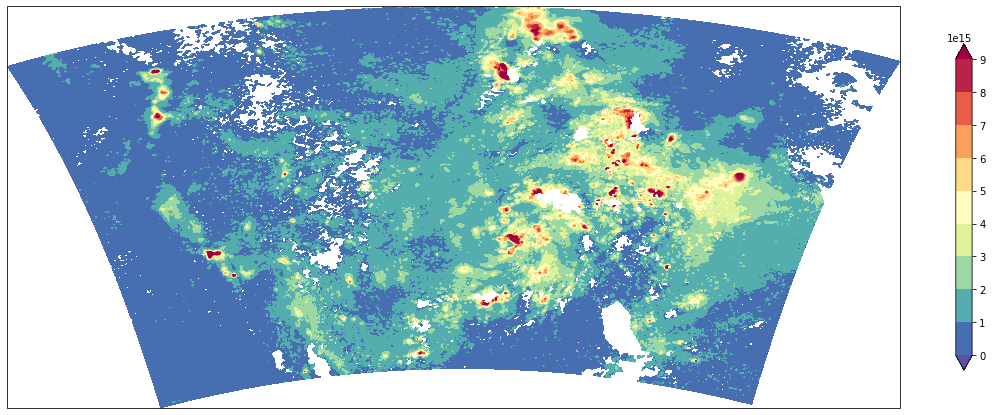

In [9]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
clev = np.arange(0, 1e16, 1*1e15)
plt.contourf(lon, lat, no2grid, clev, cmap='Spectral_r', extend='both')
cbar=plt.colorbar(shrink=0.6)
plt.show()
fig.savefig('/Users/mengli/Work/melodies-monet/outdata/paried_trp_no2_20190715.png')

In [10]:
# 2. paired WRF-Chem NO2 trop. columns
no2grid = paired_obs_stack['no2trpcol']
no2grid = no2grid[0,:,:] # time, lat, lon
print('Paired WRF-Chem NO2: ',no2grid, np.nanmin(no2grid), np.nanmax(no2grid))

Paired WRF-Chem NO2:  <xarray.DataArray 'no2trpcol' (x: 284, ll: 440)>
array([[5.6082549e+14, 5.6167260e+14, 5.6204234e+14, ..., 5.0799893e+14,
        5.1312666e+14, 5.1356541e+14],
       [4.3689763e+14, 4.3674170e+14, 4.3980378e+14, ..., 4.4611728e+14,
        4.5124336e+14, 5.9029769e+14],
       [4.4412458e+14, 4.4394268e+14, 4.4651554e+14, ..., 4.3647317e+14,
        4.4146513e+14, 5.8461524e+14],
       ...,
       [6.1838302e+14, 5.8272177e+14, 6.3751018e+14, ..., 7.8216743e+14,
        7.7528978e+14, 7.7019125e+14],
       [6.0601183e+14, 5.6466828e+14, 5.7435168e+14, ..., 6.6657966e+14,
        6.9247543e+14, 7.3247808e+14],
       [6.1570953e+14, 5.6744309e+14, 5.6898807e+14, ..., 6.5825655e+14,
        6.7548454e+14, 6.9849134e+14]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2019-07-15
    lon      (x, ll) float32 -122.3 -122.2 -122.1 ... -60.68 -60.52 -60.37
    lat      (x, ll) float32 21.19 21.22 21.24 21.27 ... 50.33 50.28 50.24 50.2
  * x        (x) int64

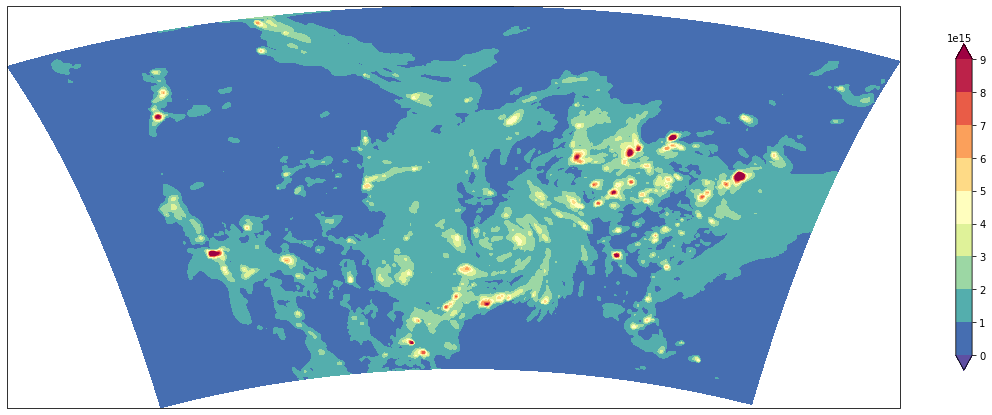

In [11]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
clev = np.arange(0, 1e16, 1*1e15)
plt.contourf(lon, lat, no2grid, clev, cmap='Spectral_r', extend='both')
cbar=plt.colorbar(shrink=0.6)
plt.show()
fig.savefig('/Users/mengli/Work/melodies-monet/outdata/paried_wrfchem_no2_20190715.png')

In [12]:
# --- save paired data ---
an.save_analysis()

Writing: /Users/mengli/Work/melodies-monet/outdata/save_intermediate/201907_tropomi_l2_no2_wrfchem_v4.2.nc4


In [13]:
# --- read saved paired data ---
an.read_analysis()
paired_obs = an.paired['tropomi_l2_no2_wrfchem_v4.2'].obj
paired_obs

Reading: /Users/mengli/Work/melodies-monet/outdata/read_intermediate/201907_tropomi_l2_no2_wrfchem_v4.2.nc4


<xarray.Dataset>
Dimensions:                              (time: 1, y: 124960)
Coordinates:
  * time                                 (time) datetime64[ns] 2019-07-15
    lon                                  (y) float32 ...
    lat                                  (y) float32 ...
    x                                    (y) int64 ...
    ll                                   (y) int64 ...
Dimensions without coordinates: y
Data variables:
    nitrogendioxide_tropospheric_column  (time, y) float32 ...
    latitude                             (y) float32 ...
    longitude                            (y) float32 ...
    no2trpcol                            (time, y) float32 ...
Attributes:
    description:   daily tropomi data at model grids,passing at localtime 13:30
    title:         
    format:        NetCDF-4
    date_created:  2024-01-08
    dict_json:     {\n    "type": "sat_swath_clm",\n    "radius_of_influence"...
    group_name:    tropomi_l2_no2_wrfchem_v4.2

DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'tEXt' 41 57
DEBUG:PIL.PngImagePlugin:STREAM b'pHYs' 110 9
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 131 63214
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'pHYs' 41 9
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 62 8192
DEBUG:PIL.Image:Error closing: 'NoneType' object has no attribute 'close'


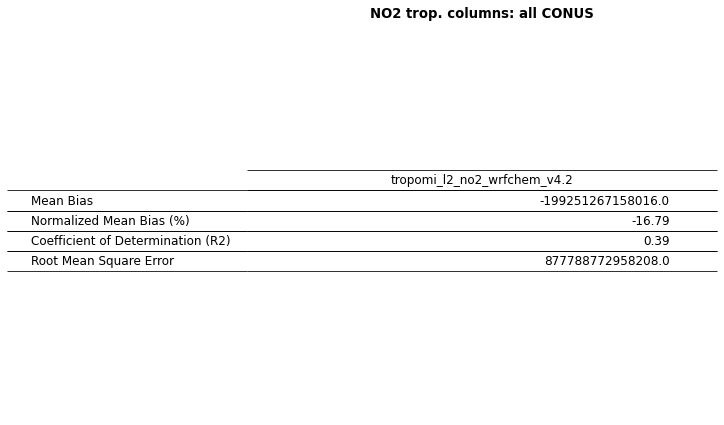

In [14]:
# output statistics
an.stats() 

{'color': 'k', 'linestyle': '-', 'marker': '*', 'linewidth': 2.0, 'markersize': 10.0, 'label': 'tropomi_l2_no2', 'fontsize': 14.4}
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'tEXt' 41 57
DEBUG:PIL.PngImagePlugin:STREAM b'pHYs' 110 9
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 131 51784
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'pHYs' 41 9
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 62 8192
DEBUG:PIL.Image:Error closing: 'NoneType' object has no attribute 'close'
-3295428381801185.5 3295428381801185.5
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'tEXt' 41 57
DEBUG:PIL.PngImagePlugin:STREAM b'pHYs' 110 9
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 131 65536
DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'pHYs' 41 9
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 62 8192
DEBUG:PIL.Image:Error closing: 'NoneType' object has no attribute 'close'
Reference std: 1091791700000

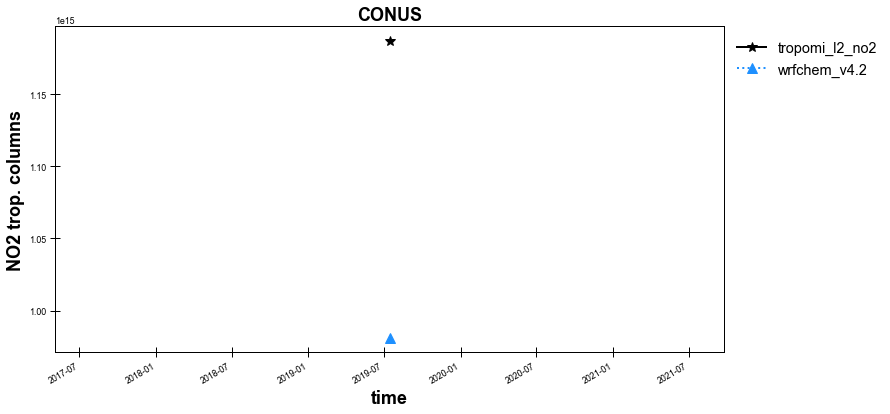

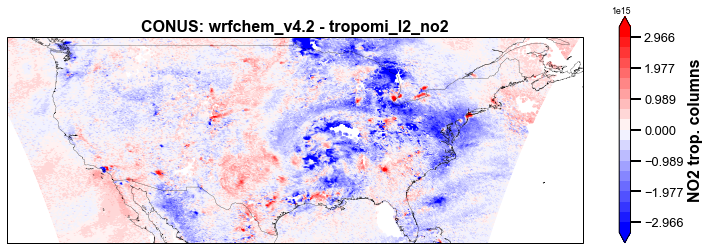

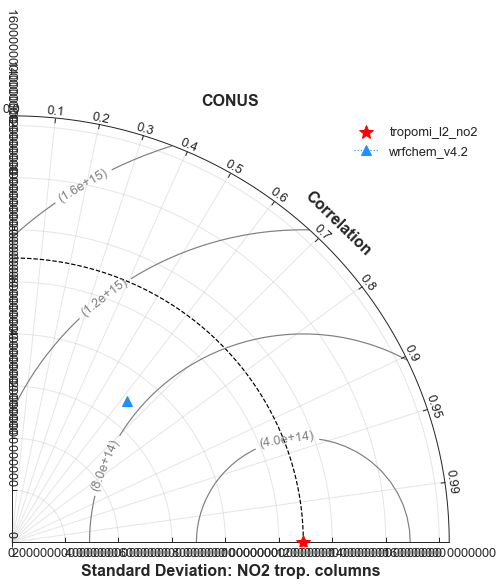

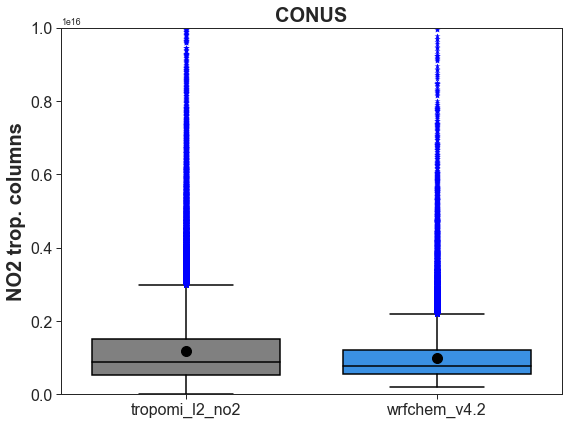

In [15]:
# plotting based on the paired data
an.plotting()